# Model Development

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your preprocessed dataset
df = pd.read_csv('/content/drive/MyDrive/intern ai/finalized_features.csv')

In [ ]:
df.head()

,rolling_mean_6,RH_1,rolling_std_6,Appliances_lag_10,rolling_std_3,Appliances_lag_30,Appliances
0,-0.42175,1.863478,-0.447349,-0.367589,-0.332697,-0.367424,60
1,-0.42175,1.634348,-0.447349,-0.367589,-0.332697,-0.367424,60
2,-0.42175,1.534580,-0.447349,-0.367589,-0.415141,-0.367424,50
3,-0.42175,1.475395,-0.447349,-0.465155,-0.415141,-0.367424,50
4,-0.42175,1.543034,-0.447349,-0.465155,-0.415141,-0.367424,60


In [ ]:
#spliit dataset
X = df.drop('Appliances', axis=1)
y = df['Appliances']

#spliit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Baseline Models

In [ ]:
# 1. Linear Regression Model
print("Linear Regression Model Evaluation:")
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_regressor.predict(X_test)

# Evaluate the Linear Regression Model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}")
print(f"Linear Regression - R2: {r2_lr}")

Linear Regression Model Evaluation:
Linear Regression - MSE: 2694.415951639393
Linear Regression - R2: 0.7307493330166563


In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Performance:
MSE: 1546.8390882212489
R2 Score: 0.8454257012670704


#### The non-linear nature of Random Forest allows it to capture complex relationships in the data better than the linear regression model, which assumes a linear relationship between features and the target.

## 2. Deep Learning Model Design

### LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

# Reshape input data to 3D for LSTM (samples, time steps, features)
X_train_lstm = np.expand_dims(X_train, axis=1)
X_test_lstm = np.expand_dims(X_test, axis=1)

In [ ]:
# Define LSTM model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer with one neuron
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile model
#3. Activation Functions and Optimizers
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Using 'adam' optimizer and 'mse' loss function

# ## 4. Loss Functions
# Loss function already defined in model.compile (Mean Squared Error)

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train model
history = model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 18337.1426 - mse: 18337.1426 - val_loss: 7974.0796 - val_mse: 7974.0796
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7007.4438 - mse: 7007.4438 - val_loss: 4275.3691 - val_mse: 4275.3691
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 4126.6997 - mse: 4126.6997 - val_loss: 3270.5640 - val_mse: 3270.5640
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3793.8245 - mse: 3793.8245 - val_loss: 2422.5408 - val_mse: 2422.5408
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2785.7825 - mse: 2785.7825 - val_loss: 1994.1327 - val_mse: 1994.1327
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2464.5125 - mse: 2464.5125 - val_loss: 1822.5593 - val_mse: 1822.5593
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2234.5825 - mse: 2234.5825 - val_loss: 1661.8767 - val_mse: 1661.8767
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2072.9751 - mse: 207

In [ ]:
# Evaluate model
y_pred = model.predict(X_test_lstm)
# Convert y_pred to a 1D array
y_pred = y_pred.flatten()  # or y_pred = y_pred.reshape(-1)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"LSTM Model - MSE: {mse}")
print(f"LSTM Model - R2: {r2}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
LSTM Model - MSE: 1447.681640625
LSTM Model - R2: 0.8553344011306763


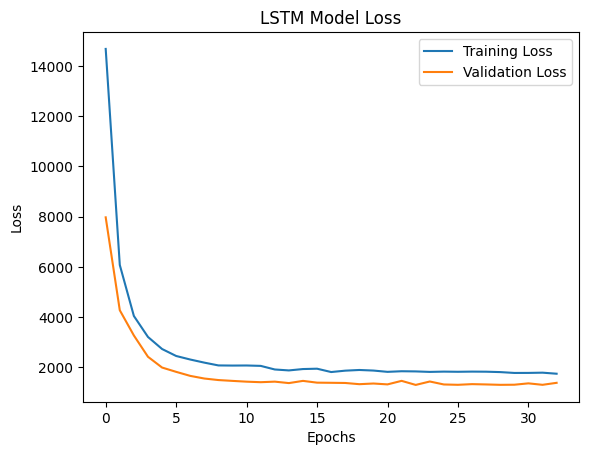

In [ ]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### GRU Model

In [ ]:
from tensorflow.keras.layers import GRU

# Reshape input data to 3D for GRU (samples, time steps, features)
X_train_gru = np.expand_dims(X_train, axis=1)
X_test_gru = np.expand_dims(X_test, axis=1)


In [ ]:
# Define GRU model
gru_model = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])),
    Dropout(0.2),
    GRU(32, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer with one neuron
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mse', metrics=['mse'])


In [ ]:
# Early stopping for GRU
early_stopping_gru = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train GRU model
history_gru = gru_model.fit(
    X_train_gru, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_gru],
    verbose=1
)

Epoch 1/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 17542.1230 - mse: 17542.1230 - val_loss: 8041.7676 - val_mse: 8041.7676
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7137.8770 - mse: 7137.8770 - val_loss: 4213.9087 - val_mse: 4213.9087
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4129.0010 - mse: 4129.0010 - val_loss: 3123.0168 - val_mse: 3123.0168
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3373.8113 - mse: 3373.8113 - val_loss: 2370.7219 - val_mse: 2370.7219
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2593.7058 - mse: 2593.7058 - val_loss: 1977.6050 - val_mse: 1977.6050
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2435.4500 - mse: 2435.4500 - val_loss: 1820.9365 - val_mse: 1820.9365
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2381.3208 - mse: 2381.3208 - val_loss: 1699.7330 - val_mse: 1699.7330
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2244.6899 - mse: 2

In [ ]:
# Evaluate GRU model
y_pred_gru = gru_model.predict(X_test_gru)
# Reshape predictions to 1D before calculating residuals
y_pred_gru = y_pred_gru.flatten()  # or y_pred_gru = y_pred_gru.reshape(-1)
mse_gru = mean_squared_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)

print(f"GRU Model - MSE: {mse_gru}")
print(f"GRU Model - R2: {r2_gru}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
GRU Model - MSE: 1404.9688720703125
GRU Model - R2: 0.859602689743042


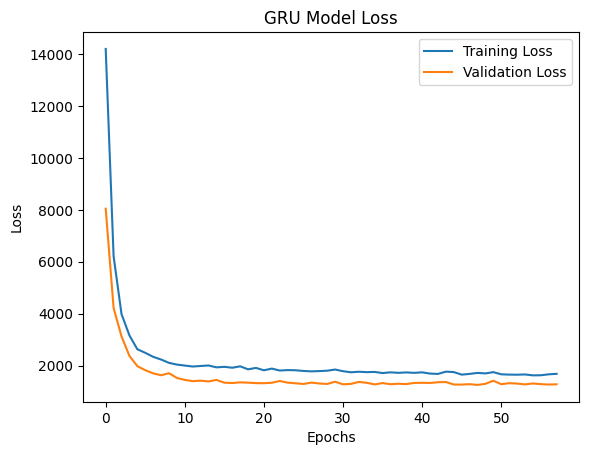

In [ ]:
# Plot training history for GRU
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### CNN-LSTM Hybrid Model

In [ ]:
# Reshape data for CNN-LSTM
X_train_cnn_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_cnn_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define CNN-LSTM model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten


In [ ]:
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=1, activation='relu',
                         input_shape=(X_train_cnn_lstm.shape[1], X_train_cnn_lstm.shape[2])))
cnn_lstm_model.add(MaxPooling1D(pool_size=1))
cnn_lstm_model.add(LSTM(64, activation='tanh'))
cnn_lstm_model.add(Dropout(0.2))
cnn_lstm_model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
# Early stopping
early_stopping_cnn_lstm = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_cnn_lstm = cnn_lstm_model.fit(
    X_train_cnn_lstm, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping_cnn_lstm],
    verbose=1
)



Epoch 1/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 17654.7324 - mse: 17654.7324 - val_loss: 15062.5000 - val_mse: 15062.5000
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14765.2539 - mse: 14765.2539 - val_loss: 13045.1758 - val_mse: 13045.1758
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12755.8994 - mse: 12755.8994 - val_loss: 11815.7881 - val_mse: 11815.7881
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11904.3467 - mse: 11904.3467 - val_loss: 11099.7021 - val_mse: 11099.7021
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11755.1611 - mse: 11755.1611 - val_loss: 10563.2119 - val_mse: 10563.2119
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10155.4209 - mse: 10155.4209 - val_loss: 9299.3623 - val_mse: 9299.3623
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9312.1230 - mse: 9312.1230 - val_loss: 8512.9766 - val_mse: 8512.9766
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 

In [ ]:
# Evaluate the model
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

print(f"CNN-LSTM Model - MSE: {mse_cnn_lstm}")
print(f"CNN-LSTM Model - R2: {r2_cnn_lstm}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN-LSTM Model - MSE: 1373.8555908203125
CNN-LSTM Model - R2: 0.8627117872238159


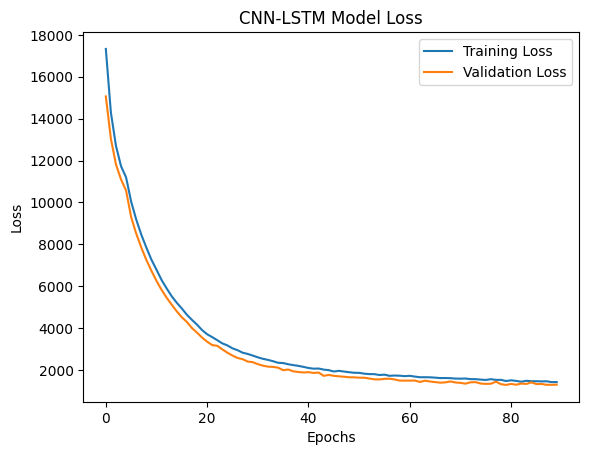

In [ ]:
# Plot training history
plt.plot(history_cnn_lstm.history['loss'], label='Training Loss')
plt.plot(history_cnn_lstm.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Create a DataFrame for results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'LSTM', 'GRU', 'CNN-LSTM'],
    'MSE': [mse_lr, mean_squared_error(y_test, y_pred_rf), mse, mse_gru, mse_cnn_lstm],
    'R2': [r2_lr, r2_score(y_test, y_pred_rf), r2, r2_gru, r2_cnn_lstm]
})

print(results_df)


               Model          MSE        R2
0  Linear Regression  2694.415952  0.730749
1      Random Forest  1546.839088  0.845426
2               LSTM  1447.681641  0.855334
3                GRU  1404.968872  0.859603
4           CNN-LSTM  1373.855591  0.862712


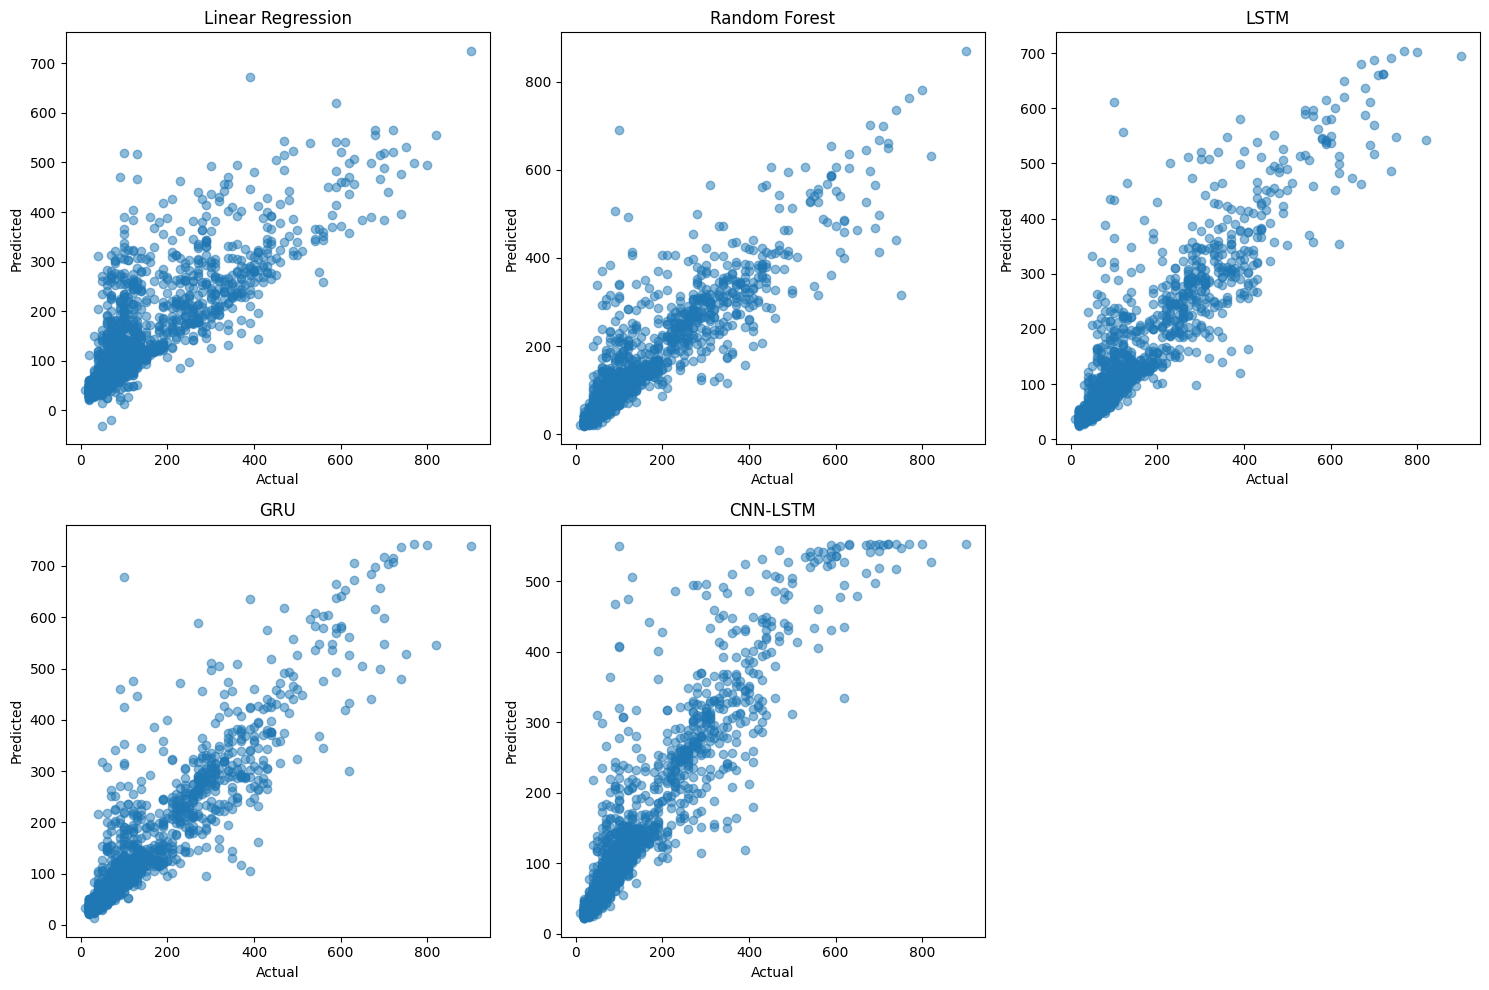

In [ ]:
# Plotting predicted vs. actual values for all models
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('LSTM')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_gru, alpha=0.5)
plt.title('GRU')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_cnn_lstm, alpha=0.5)
plt.title('CNN-LSTM')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()



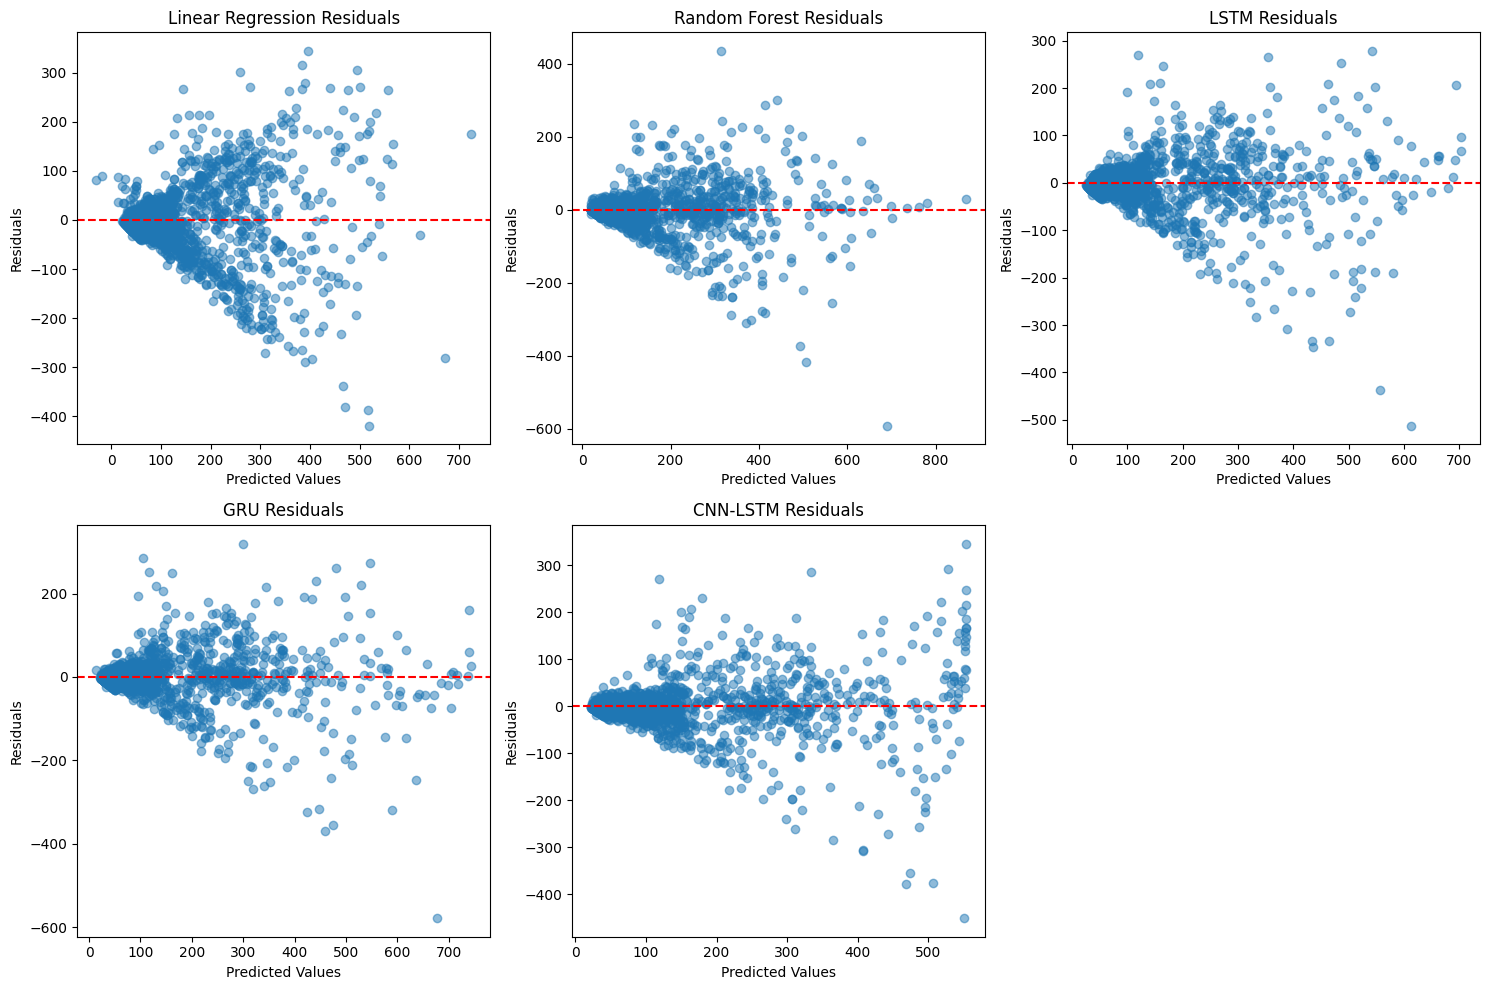

In [ ]:
# Residual plots for each model
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
residuals_lr = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5)
plt.title('Linear Regression Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(2, 3, 2)
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.title('Random Forest Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(2, 3, 3)
residuals_lstm = y_test - y_pred
plt.scatter(y_pred, residuals_lstm, alpha=0.5)
plt.title('LSTM Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(2, 3, 4)
residuals_gru = y_test - y_pred_gru
plt.scatter(y_pred_gru, residuals_gru, alpha=0.5)
plt.title('GRU Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(2, 3, 5)
# Reshape y_pred_cnn_lstm to 1D before calculating residuals
residuals_cnn_lstm = y_test - y_pred_cnn_lstm.flatten()
plt.scatter(y_pred_cnn_lstm.flatten(), residuals_cnn_lstm, alpha=0.5) # Flatten here as well
plt.title('CNN-LSTM Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

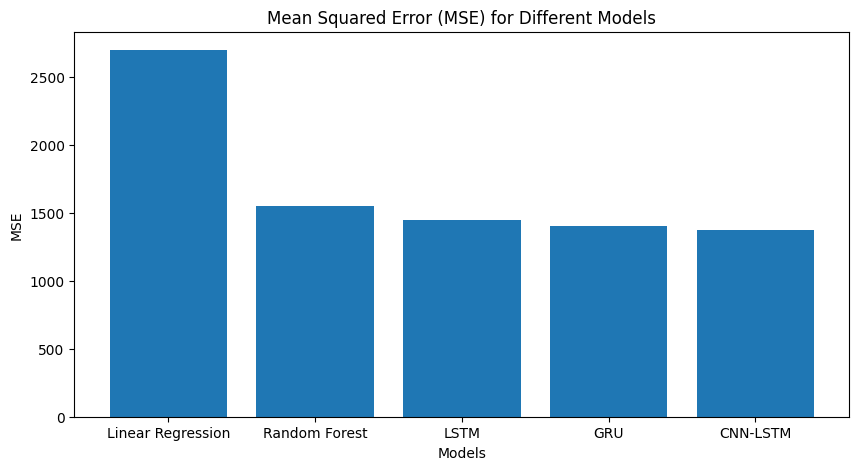

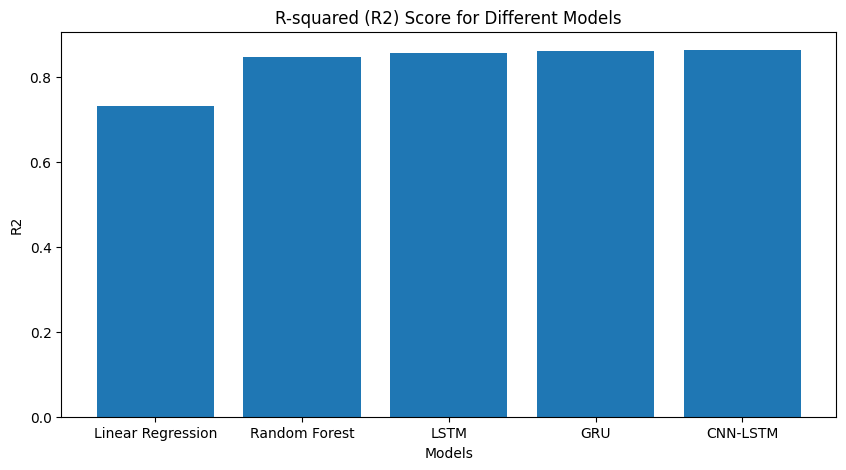

In [ ]:
#Plot the evaluation metrics mse and r2 seperately

mse_values = [mse_lr, mean_squared_error(y_test, y_pred_rf), mse, mse_gru, mse_cnn_lstm]
r2_values = [r2_lr, r2_score(y_test, y_pred_rf), r2, r2_gru, r2_cnn_lstm]
model_names = ['Linear Regression', 'Random Forest', 'LSTM', 'GRU', 'CNN-LSTM']

plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_values)
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values)
plt.title('R-squared (R2) Score for Different Models')
plt.xlabel('Models')
plt.ylabel('R2')
plt.show()

In [ ]:
# Find the best base model (Linear Regression or Random Forest)
best_base_model = None
best_base_mse = float('inf')
best_base_r2 = -float('inf')

if mse_lr < best_base_mse:
    best_base_model = "Linear Regression"
    best_base_mse = mse_lr
    best_base_r2 = r2_lr

if mean_squared_error(y_test, y_pred_rf) < best_base_mse:
    best_base_model = "Random Forest"
    best_base_mse = mean_squared_error(y_test, y_pred_rf)
    best_base_r2 = r2_score(y_test, y_pred_rf)

print(f"\nBest Base Model: {best_base_model}")
print(f"Best Base Model MSE: {best_base_mse}")
print(f"Best Base Model R2: {best_base_r2}")


# Find the best deep learning model (LSTM, GRU, or CNN-LSTM)
best_dl_model = None
best_dl_mse = float('inf')
best_dl_r2 = -float('inf')

if mse < best_dl_mse :
    best_dl_model = "LSTM"
    best_dl_mse = mse
    best_dl_r2 = r2

if mse_gru < best_dl_mse:
    best_dl_model = "GRU"
    best_dl_mse = mse_gru
    best_dl_r2 = r2_gru

if mse_cnn_lstm < best_dl_mse:
    best_dl_model = "CNN-LSTM"
    best_dl_mse = mse_cnn_lstm
    best_dl_r2 = r2_cnn_lstm

print(f"\nBest Deep Learning Model: {best_dl_model}")
print(f"Best Deep Learning Model MSE: {best_dl_mse}")
print(f"Best Deep Learning Model R2: {best_dl_r2}")


Best Base Model: Random Forest
Best Base Model MSE: 1546.8390882212489
Best Base Model R2: 0.8454257012670704

Best Deep Learning Model: CNN-LSTM
Best Deep Learning Model MSE: 1373.8555908203125
Best Deep Learning Model R2: 0.8627117872238159


## Model Optimization

#### Hyperparameter Tuning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define a function to create the model
def create_model(units=64, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        LSTM(units, activation='tanh', return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dropout(dropout_rate),
        LSTM(units // 2, activation='tanh', return_sequences=False),
        Dropout(dropout_rate),
        Dense(units // 4, activation='relu'),
        Dense(1)  # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mse'])
    return model

In [ ]:
# Hyperparameter combinations
param_grid = {
    'units': [16, 32, 64],
    'dropout_rate': [0.1, 0.2],
    'learning_rate': [0.001, 0.0001],
    'epochs': [10, 20],
    'batch_size': [16, 32]
}

# Manual Hyperparameter Tuning
optimized_model = None
best_mse = float('inf')

for units in param_grid['units']:
    for dropout_rate in param_grid['dropout_rate']:
        for learning_rate in param_grid['learning_rate']:
            # Create and train the model
            model = create_model(units=units, dropout_rate=dropout_rate, learning_rate=learning_rate)
            history = model.fit(
                X_train_lstm, y_train,
                validation_split=0.2,
                epochs=10,  # We'll update this in Step 3
                batch_size=16,  # We'll update this in Step 3
                verbose=0
            )
            mse = model.evaluate(X_test_lstm, y_test, verbose=0)[0]
            if mse < best_mse:
                best_mse = mse
                optimized_model = model
                print(f"New Best MSE: {mse}, Params: units={units}, dropout_rate={dropout_rate}, learning_rate={learning_rate}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


New Best MSE: 1951.7877197265625, Params: units=16, dropout_rate=0.1, learning_rate=0.001
New Best MSE: 1592.7662353515625, Params: units=32, dropout_rate=0.1, learning_rate=0.001
New Best MSE: 1502.3511962890625, Params: units=64, dropout_rate=0.1, learning_rate=0.001


#### Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Add early stopping to the model training process
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the best model with early stopping
final_history = optimized_model.fit(
    X_train_lstm, y_train,
    validation_split=0.1,
    epochs=10,  # Tuned parameter
    batch_size=64,  # Tuned parameter
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1888.6027 - mse: 1888.6027 - val_loss: 1269.1447 - val_mse: 1269.1447
Epoch 2/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1808.9812 - mse: 1808.9812 - val_loss: 1219.1279 - val_mse: 1219.1279
Epoch 3/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1646.1162 - mse: 1646.1162 - val_loss: 1245.7544 - val_mse: 1245.7544
Epoch 4/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1763.0266 - mse: 1763.0266 - val_loss: 1218.3348 - val_mse: 1218.3348
Epoch 5/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1811.0898 - mse: 1811.0898 - val_loss: 1240.6494 - val_mse: 1240.6494
Epoch 6/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1781.4338 - mse: 1781.4338 - val_loss: 1255.4989 - val_mse: 1255.4989
Epoch 7/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1719.2368 - mse: 1719.2368 - val_loss: 1226.8225 - val_mse: 1226.8225
Epoch 8/10
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1758.1490 - mse: 1758.1490 - v

#### Model Evaluation Post-Optimization

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = optimized_model.predict(X_test_lstm).flatten()

# Evaluate the optimized model
optimized_mse = mean_squared_error(y_test, y_pred)
optimized_r2 = r2_score(y_test, y_pred)

print(f"Optimized Model - MSE: {optimized_mse}")
print(f"Optimized Model - R²: {optimized_r2}")


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Optimized Model - MSE: 1412.8773193359375
Optimized Model - R²: 0.8588123321533203



Comparison with Original Model:
Original Model - MSE: 1373.8555908203125
Original Model - R2: 0.8627117872238159

Optimized Model - MSE: 1412.8773193359375
Optimized Model - R²: 0.8588123321533203

Optimized Model Improvement (MSE): -39.021728515625
Optimized Model Improvement (R2): -0.0038994550704956055


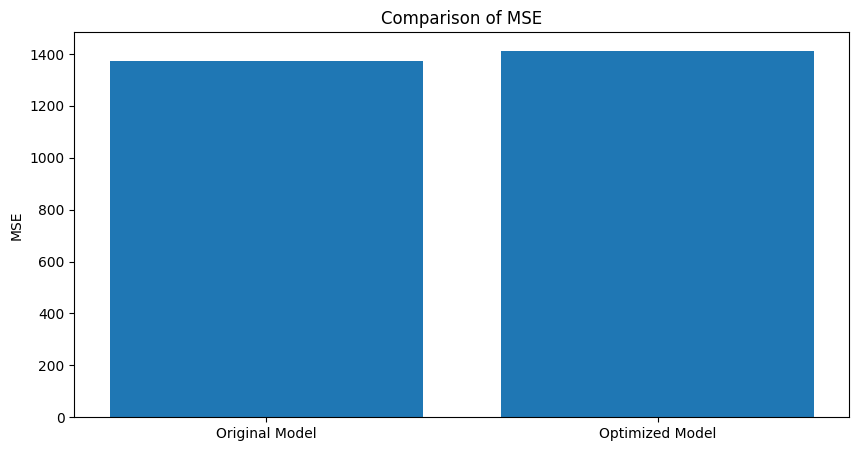

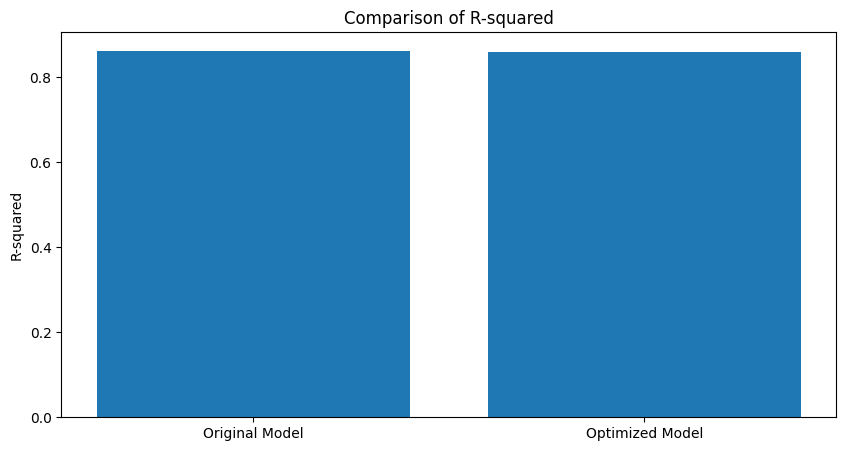

In [ ]:
print("\nComparison with Original Model:")
print(f"Original Model - MSE: {mse_cnn_lstm}")
print(f"Original Model - R2: {r2_cnn_lstm}")

print(f"\nOptimized Model - MSE: {optimized_mse}")
print(f"Optimized Model - R²: {optimized_r2}")

# Compare MSE and R2
print(f"\nOptimized Model Improvement (MSE): {mse_cnn_lstm-optimized_mse}")
print(f"Optimized Model Improvement (R2): {optimized_r2-r2_cnn_lstm}")


# Visualize the Comparison
models = ['Original Model', 'Optimized Model']
mse_scores = [mse_cnn_lstm, optimized_mse]
r2_scores = [r2_cnn_lstm, optimized_r2]

plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores)
plt.title('Comparison of MSE')
plt.ylabel('MSE')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores)
plt.title('Comparison of R-squared')
plt.ylabel('R-squared')
plt.show()

In [ ]:
# prompt: save all models /content/drive/MyDrive/intern ai/(name)
import joblib
#save all model in above
joblib.dump(linear_regressor, '/content/drive/MyDrive/intern ai/linear_regression_model.pkl')
joblib.dump(rf, '/content/drive/MyDrive/intern ai/random_forest_model.pkl')
model.save('/content/drive/MyDrive/intern ai/lstm_model.keras')
gru_model.save('/content/drive/MyDrive/intern ai/gru_model.keras')
cnn_lstm_model.save('/content/drive/MyDrive/intern ai/cnn_lstm_model.keras')
joblib.dump(optimized_model, '/content/drive/MyDrive/intern ai/optimized_model.pkl')

['/content/drive/MyDrive/intern ai/optimized_model.pkl']